# FIT5202 Assignment 2 : Predict Retail Sales

Full Name: Chantelle Loh Yi Wei

Username: cloh0007

ID: 31171109

## Table of Contents
* [1. Data Loading and Preparation](#data-preparation)
* [2.Feature Selection & ML Training](#feat-select)


# 1 : Data Loading and exploration<a class="anchor" name="data-preparation"></a> 
## 1.1: Data Loading

### 1.1.1 Create SparkSession<a class="anchor" id="1.1.1"></a>

Write the code to get a SparkSession. For creating the SparkSession, you need to use a SparkConf object to configure the Spark app with a proper application name, to enable the maximum partition size not exceed 10MB, and to run locally with as many working processors as local cores on your machine

In [17]:
from pyspark import SparkConf

master = "local[*]"

app_name = "31171109 Assignment 2 FIT5202"

spark_conf = SparkConf().setMaster(master).setAppName(app_name).set("spark.sql.files.maxPartitionBytes", "10m")

from pyspark import SparkContext
from pyspark.sql import SparkSession


spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')

### 1.1.2 Define schemas<a class="anchor" id="1.1.1"></a>

Write code to define the data schema for features, sales and stores datasets, following the data types suggested in the metadata file.

In [18]:
from pyspark.sql.types import *


feat_schema = StructType([
    StructField("Store", IntegerType(), True),
    StructField("Date", DateType(), True), 
    StructField("Temperature", FloatType(), True),
    StructField("Fuel_Price", FloatType(), True),
    StructField("MarkDown1", FloatType(), True),
    StructField("MarkDown2", FloatType(), True),
    StructField("MarkDown3", FloatType(), True),
    StructField("MarkDown4", FloatType(), True),
    StructField("MarkDown5", FloatType(), True),
    StructField("CPI", FloatType(), True),
    StructField("Unemployment", FloatType(), True),
    StructField("IsHoliday", BooleanType(), True)
])





sales_schema = StructType([
    StructField("Store", IntegerType(), True),
    StructField("Dept", IntegerType(), True),
    StructField("Date", DateType(), True),
    StructField("Weekly_Sales", FloatType(), True),
    StructField("IsHoliday", BooleanType(), True)
])


stores_schema = StructType([
    StructField("Store", IntegerType(), True),
    StructField("Type", StringType(), True),
    StructField("Size", IntegerType(), True)
])


### 1.1.3 Load three DF<a class="anchor" id="1.1.1"></a>

Using predefined schema, write code to load the features, sales and stores csv files into separate dataframes. Print the schemas for all of the dataframes

In [27]:
feat_df = spark.read.csv("Features.csv", header=True, dateFormat="dd/MM/yyyy",schema=feat_schema)
sales_df = spark.read.csv("sales.csv", header=True,  dateFormat="dd/MM/yyyy", schema=sales_schema)
stores_df = spark.read.csv("stores.csv", header=True, schema=stores_schema)
print("Features")
feat_df.printSchema()

feat_df.show()

print("Sales")
sales_df.printSchema()

sales_df.show()


print("Stores")
stores_df.printSchema()

stores_df.show()



Features
root
 |-- Store: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Temperature: float (nullable = true)
 |-- Fuel_Price: float (nullable = true)
 |-- MarkDown1: float (nullable = true)
 |-- MarkDown2: float (nullable = true)
 |-- MarkDown3: float (nullable = true)
 |-- MarkDown4: float (nullable = true)
 |-- MarkDown5: float (nullable = true)
 |-- CPI: float (nullable = true)
 |-- Unemployment: float (nullable = true)
 |-- IsHoliday: boolean (nullable = true)

+-----+----------+-----------+----------+---------+---------+---------+---------+---------+---------+------------+---------+
|Store|      Date|Temperature|Fuel_Price|MarkDown1|MarkDown2|MarkDown3|MarkDown4|MarkDown5|      CPI|Unemployment|IsHoliday|
+-----+----------+-----------+----------+---------+---------+---------+---------+---------+---------+------------+---------+
|    1|2010-02-05|      42.31|     2.572|     null|     null|     null|     null|     null|211.09636|       8.106|    false|
|    1|2010

## 1.2: Data Exploration

### 1.2.1 Exploring the data<a class="anchor" id="1.1.1"></a>

Write code to show the total ‘null’ counts for each column in all of the three dataframes.

In [28]:

from pyspark.sql.functions import col, sum

feat_null = feat_df.select([sum(col(i).isNull().cast("int")).alias(i) for i in feat_df.columns])


sales_null = sales_df.select([sum(col(i).isNull().cast("int")).alias(i) for i in sales_df.columns])


stores_null = stores_df.select([sum(col(i).isNull().cast("int")).alias(i) for i in stores_df.columns])




print(f"Features Total null count:")
feat_null.show()
print(f"Sales Total null count:")
sales_null.show()
print(f"Stores Total null count:")
stores_null.show()





Features Total null count:
+-----+----+-----------+----------+---------+---------+---------+---------+---------+---+------------+---------+
|Store|Date|Temperature|Fuel_Price|MarkDown1|MarkDown2|MarkDown3|MarkDown4|MarkDown5|CPI|Unemployment|IsHoliday|
+-----+----+-----------+----------+---------+---------+---------+---------+---------+---+------------+---------+
|    0|   0|          0|         0|     4158|     5269|     4577|     4726|     4140|585|         585|        0|
+-----+----+-----------+----------+---------+---------+---------+---------+---------+---+------------+---------+

Sales Total null count:
+-----+----+----+------------+---------+
|Store|Dept|Date|Weekly_Sales|IsHoliday|
+-----+----+----+------------+---------+
|    0|   0|   0|           0|        0|
+-----+----+----+------------+---------+

Stores Total null count:
+-----+----+----+
|Store|Type|Size|
+-----+----+----+
|    0|   0|   0|
+-----+----+----+



### 1.2.2 Exploring the data<a class="anchor" id="1.1.1"></a>

For each feature, sales, and stores dataframe, write code to show the basic statistics (including count, mean, stddev, min, max, 25 percentile, 50 percentile, 75 percentile) for each numeric column, except for the columns of “Store,” “Dept," and "Date."

In [29]:
from pyspark.sql.functions import col

feat_remove = feat_df.drop('Store','Date')
feat_remove.summary().show()

sales_remove = sales_df.drop('Store','Date','Dept')
sales_remove.summary().show()

stores_remove = stores_df.drop('Store')
stores_remove.summary().show()

+-------+-----------------+-------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|      Temperature|         Fuel_Price|        MarkDown1|        MarkDown2|         MarkDown3|         MarkDown4|         MarkDown5|               CPI|      Unemployment|
+-------+-----------------+-------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|             8190|               8190|             4032|             2921|              3613|              3464|              4050|              7605|              7605|
|   mean|59.35619783547044| 3.4059918166662455|7032.371786093377|3384.176592808865| 1760.100175767131|3292.9358917338986| 4132.216426581866|172.46080930610773| 7.826821060575677|
| stddev|18.67860685977584|0.43133656955877725|9262.747449416804|8793.583001259363|11276.462186969284| 67

### 1.2.3 Exploring the data<a class="anchor" id="1.1.1"></a>

Write code to display a histogram to show the distribution of the weekly sales for stores with log-scale for the frequency axis. Describe what you observe from the plot

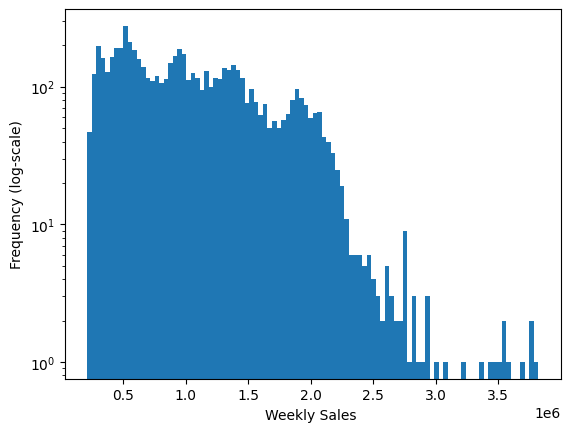

In [30]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# groupby since sales is separated by Departments 
weekly_sale=sales_df.groupby('Store','Date').agg(F.sum('Weekly_Sales').alias('Weekly_Sales'))
sales_pandas = weekly_sale.toPandas()
plt.hist(sales_pandas['Weekly_Sales'], log=True, bins=100)  
plt.xlabel('Weekly Sales ')
plt.ylabel('Frequency (log-scale)')
plt.show()

*Ans:*

The histogram bins are generally decreasing from left to right and has a sharp decrease between 2 to 2.5 x 10^6 Weekly Sales, it generally indicates that the frequency of weekly sales is decreasing as the value of weekly sales increases. We can conclude that there are more occurrences of low weekly sales values up till (2x10^6) and fewer occurrences of high weekly sales values (more than 2x10^6).

# 2. Feature extraction & ML Training<a class="anchor" name="feat-select"></a> 
## 2.1 Prepare label and feature columns

### 2.1.1 Prepare label columns<a class="anchor" id="1.1.1"></a>

We need a model to predict whether a store achieved the goal at a particular date of week, which means the weekly sales of the store divided by its size is greater than 8.5. Write code to create an additional class label column called "achieve_goal".

○	Use 1 to label goal achieved: Weekly_Sales of store/ Size ≥ 8.5
○	Use 0 to label goal not achieved: Weekly_Sales of store/ Size < 8.5

In [31]:
# Since it is store achieving goal by that date, we can group as such. 
# isHoliday is added so that it can be more accurate (it may be excluded since a Date is decided to be a Holiday or not)
weekly_sales= sales_df.groupby('Store','Date','isHoliday').agg(F.sum('Weekly_Sales').alias('Weekly_Sales'))

In [32]:
joined = weekly_sales.join(stores_df, ['Store'])
joined = joined.join(feat_df,['Store','Date','isHoliday'])
joined=joined.fillna(0) #we cannot work with null values from MD and other columns
#filling it with 0 works better (better accuracy) than interpolation or iterativeimp
# joined.sort('Store','Date').show()

In [35]:
from pyspark.sql.functions import *

#populating label values with condition 
joined=joined.withColumn("achieve_goal", \
   when((joined.Weekly_Sales/joined.Size >= 8.5), lit(1)) \
     .otherwise(lit(0)))

# joined.show()



### 2.1.2 Prepare feature columns<a class="anchor" id="1.1.1"></a>
Write code to add additional feature columns: Month, day_of_week, day_of_year and week_of_year (these can be generated from the Date column).

In [36]:

joined = joined.withColumn("Month", month("Date")) \
       .withColumn("day_of_week", dayofweek("Date")) \
       .withColumn("day_of_year", dayofyear("Date")) \
       .withColumn("week_of_year", weekofyear("Date"))

#remove unwanted column 

# joined.show()


In [37]:
joined.printSchema()

root
 |-- Store: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- isHoliday: boolean (nullable = true)
 |-- Weekly_Sales: double (nullable = false)
 |-- Type: string (nullable = true)
 |-- Size: integer (nullable = true)
 |-- Temperature: float (nullable = false)
 |-- Fuel_Price: float (nullable = false)
 |-- MarkDown1: float (nullable = false)
 |-- MarkDown2: float (nullable = false)
 |-- MarkDown3: float (nullable = false)
 |-- MarkDown4: float (nullable = false)
 |-- MarkDown5: float (nullable = false)
 |-- CPI: float (nullable = false)
 |-- Unemployment: float (nullable = false)
 |-- achieve_goal: integer (nullable = false)
 |-- Month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- day_of_year: integer (nullable = true)
 |-- week_of_year: integer (nullable = true)



## 2.2 Preparing Spark ML Transformers/Estimators for features, labels and models
### 2.2.1 Create Transformers/Estimators for features & ML models<a class="anchor" id="1.1.1"></a>

Write code to create Transformers/Estimators for transforming/assembling the selected feature columns

In [38]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer

#Date and Weekly_Sales are excluded from the inputFeatures
categoryInputCols = ['Type']
numericInputCols = ['Store', 'isHoliday', 'Size', 'Fuel_Price', 'MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'
                   ,'CPI','Unemployment','Month','day_of_week','day_of_year','week_of_year']
categoryOutputCol = 'achieve_goal'
categoryCols = categoryInputCols+[categoryOutputCol]

# Define the output columns
outputCols=[f'{x}_index' for x in categoryInputCols]
outputCols.append('label')

# Create the index values for categorical values which in this case is Type
inputIndexer = StringIndexer(inputCols=categoryCols, outputCols=outputCols)



# redefine inputs for encoder (Type only since label shldnt be included)
inputCols_OHE = [x for x in outputCols if x!='label']
outputCols_OHE = [f'{x}_vec' for x in categoryInputCols]

encoder = OneHotEncoder(inputCols=inputCols_OHE,
                        outputCols=outputCols_OHE)

#redefine inputs for assembler (encoded columns + numeric)
assemblerInputs = outputCols_OHE + numericInputCols

assembler = VectorAssembler(inputCols=assemblerInputs,outputCol="features")



Write code to create ML model Estimators for the following two ML models

i.	Decision Tree
ii.	Gradient Boosted Tree model

In [39]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 5)

In [40]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 5, maxIter = 20)

#all models are put at maxDepth 5 for a balance, to avoid overfitting and under. 

### 2.2.2 Prepare pipelines<a class="anchor" id="1.1.1"></a>

Write code to include the above Transformers/Estimators into pipelines

In [41]:
from pyspark.ml import Pipeline

#Decision Tree Pipeline
dt_stages = [inputIndexer,encoder,assembler,dt]
dt_pipeline = Pipeline(stages = dt_stages)

#Gradient Boosted Tree pipeline
gbt_stages = [inputIndexer,encoder,assembler,gbt]
gbt_pipeline = Pipeline(stages = gbt_stages)


## 2.3 Preparing the training data and testing data
### 2.3.1 Preparing the training data and testing data<a class="anchor" id="1.1.1"></a>

Write code to split the data for training and testing purpose - use the data in 2010 and 2012 for training purpose and the half data in 2011 year for training and others as testing purpose;

In [42]:
from pyspark.sql.functions import year

# I filter by year first
df_2010 = joined.filter(year("Date") == 2010)
df_2012 = joined.filter(year("Date") == 2012)
df_2011 = joined.filter(year("Date") == 2011)


#then separate the 2011 
df_2011_train = df_2011.sample(False, 0.5, seed=123)  # 50% of the 2011 data for training
test = df_2011.subtract(df_2011_train)  # Remaining 50% for testing

# Combine 
train = df_2010.union(df_2011_train).union(df_2012)


# train.show()
# test.show()

## 2.4 Training and evaluating models
### 2.4.1 Training  models<a class="anchor" id="1.1.1"></a>

Write code to use the corresponding ML Pipelines to train the models on the training data from 2.3. And then use the trained models to perform predictions on the testing data from 2.3

In [43]:
dt_pipelineModel = dt_pipeline.fit(train)
dt_predictions = dt_pipelineModel.transform(test)

gbt_pipelineModel = gbt_pipeline.fit(train)
gbt_predictions = gbt_pipelineModel.transform(test)

print("Decision Tree")
dt_predictions.select('prediction','label','achieve_goal').show()
print("Gradient Boosted Tree")
gbt_predictions.select('prediction','label','achieve_goal').show()

Decision Tree
+----------+-----+------------+
|prediction|label|achieve_goal|
+----------+-----+------------+
|       0.0|  0.0|           0|
|       0.0|  0.0|           0|
|       0.0|  0.0|           0|
|       1.0|  1.0|           1|
|       1.0|  1.0|           1|
|       1.0|  1.0|           1|
|       1.0|  1.0|           1|
|       0.0|  0.0|           0|
|       0.0|  0.0|           0|
|       1.0|  1.0|           1|
|       1.0|  1.0|           1|
|       0.0|  0.0|           0|
|       1.0|  1.0|           1|
|       0.0|  0.0|           0|
|       0.0|  0.0|           0|
|       0.0|  0.0|           0|
|       1.0|  0.0|           0|
|       0.0|  0.0|           0|
|       1.0|  1.0|           1|
|       1.0|  0.0|           0|
+----------+-----+------------+
only showing top 20 rows

Gradient Boosted Tree
+----------+-----+------------+
|prediction|label|achieve_goal|
+----------+-----+------------+
|       0.0|  0.0|           0|
|       0.0|  0.0|           0|
|       0.

### 2.4.2 Evaluating models<a class="anchor" id="1.1.1"></a>

To measure classification performance, write code to display the count of each combination of above-threshold/ below-threshold label and prediction label in formats like the screenshot below. Compute the AUC, accuracy, recall, and precision for the above-threshold/below-threshold label from each model testing result using pyspark MLlib/ML APIs

In [44]:
#this is referenced from Lab 6 
def compute(predictions):
    #instead of labels, achieve_goal is used to show the format of the screenshot
    TN = predictions.filter('prediction = 0 AND achieve_goal = 0').count()
    TP = predictions.filter('prediction = 1 AND achieve_goal = 1').count()
    FN = predictions.filter('prediction = 0 AND achieve_goal = 1').count()
    FP = predictions.filter('prediction = 1 AND achieve_goal = 0').count()

    predictions.groupBy('achieve_goal', 'prediction').count().show()

    accuracy = (TP+TN)/(TP+TN+FN+FP)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")



In [45]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="achieve_goal", metricName="areaUnderROC")
dt_auc = evaluator.evaluate(dt_predictions)
compute(dt_predictions)
print("Area under ROC (AUC) on  Decision Tree's test data: ", dt_auc)


gbt_auc = evaluator.evaluate(gbt_predictions)
compute(gbt_predictions)
print("Area under ROC (AUC) on Gradient Boosted Tree's test data: ", gbt_auc)


+------------+----------+-----+
|achieve_goal|prediction|count|
+------------+----------+-----+
|           1|       0.0|   82|
|           0|       0.0|  535|
|           1|       1.0|  436|
|           0|       1.0|  129|
+------------+----------+-----+

Accuracy:0.8214890016920474
Precision:0.7716814159292036
Recall:0.8416988416988417
Area under ROC (AUC) on  Decision Tree's test data:  0.7596437875052332
+------------+----------+-----+
|achieve_goal|prediction|count|
+------------+----------+-----+
|           1|       0.0|   46|
|           0|       0.0|  616|
|           1|       1.0|  472|
|           0|       1.0|   48|
+------------+----------+-----+

Accuracy:0.9204737732656514
Precision:0.9076923076923077
Recall:0.9111969111969112
Area under ROC (AUC) on Gradient Boosted Tree's test data:  0.9738175675675674


Discuss which one is the better model based on performance metric above, and persist the better model

*Ans:* 

Gradient Boosted Tree (GBT) has a higher AUC than Decision Tree (DT), thus GBT performs better than DT. AUC evaluates how well a model distinguish between negative and positive classes, it ranges from 0 to 1 with the higher value being better at distinguishing. This shows that GBT is better at distinguishing as its AUC score is much closer to 1 (0.973) while DT is much lesser (0.760) which suggests it may have some overlap between the classes. 

The accuracy, precision and recall for GBT are higher than the corresponding metrics for DT. This indicates that the GBT model is better at predicting positive cases (achieve_goal = 1) correctly.

We can further see this trend in looking at the table generated. DT has higher False Positive than GBT, with GBT's True Positive is much higher than DT.

Therefore, we should persist the GBT model as the better performing model.



Draw a ROC plot for any model you want.

*Ans:* Decision Tree ROC is drawn here. 

Area Under ROC: 0.7596437875052332


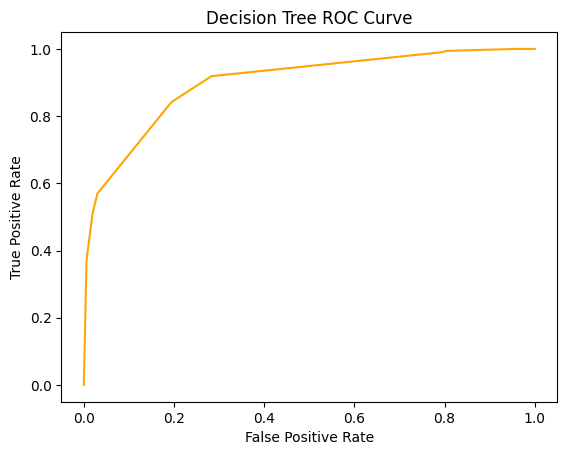

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

print("Area Under ROC: " + str(dt_auc))

# Extract probability and label columns
label = dt_predictions.select(['achieve_goal']).collect()
prob = dt_predictions.select(['probability']).rdd.map(lambda x: x[0][1]).collect()

# Compute false positive rate, true positive rate
FP, TP, _ = roc_curve(label, prob)

# Plot the ROC curve
plt.figure()
plt.plot(FP, TP, color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')

plt.show()
